When design a self-driving car, we need to train the car to perceive what's around it. One of the most important environment factor are lane lines. All the following features could be useful in the identification of lane lines on the road:
#### - Color
#### - Shape
#### - Orientation
#### - Position in the image

#### 1 Identify Lane Lines by Color
In red + green + blue [R, G, B] system, 0 is the darkest and 255 is the lightest. So white would be (255, 255, 255). Let’s code up a simple color selection in Python.
- 1.1 First, I import pyplot and image from matplotlib. I also import numpy for operating on the image.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

- 1.2 then read in an image and print out some stats. I’ll grab the x and y sizes and make a copy of the image to work with. NOTE: Always make a copy of arrays or other variables in Python. If instead, you say "a = b" then all changes you make to "a" will be reflected in "b" as well!

In [7]:
# Read in the image and print out some stats
image = mpimg.imread('/home/isaac/Dropbox/SDC/img/test.jpg')
print('This image is: ',type(image), 
         'with dimensions:', image.shape)

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


In [9]:
# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
# Note: always make a copy rather than simply using "="
color_select = np.copy(image)

- 1.3 Next I define a color threshold in the variables red_threshold, green_threshold, and blue_threshold and populate rgb_threshold with these values. This vector contains the minimum values for red, green, and blue (R,G,B) that I will allow in my selection.

In [10]:
# Define our color selection criteria
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz
red_threshold = 0
green_threshold = 0
blue_threshold = 0
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

- 1.4 Next, I'll select any pixels below the threshold and set them to zero. After that, all pixels that meet my color criterion (those above the threshold) will be retained, and those that do not (below the threshold) will be blacked out.

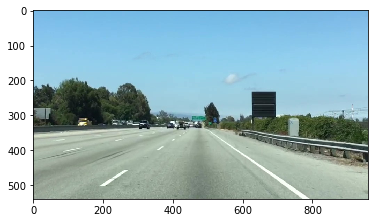

In [11]:
# Identify pixels below the threshold
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

# Display the image                 
plt.imshow(color_select)

The result, color_select, is an image in which pixels that were above the threshold have been retained, and pixels below the threshold have been blacked out.

In the code snippet above, red_threshold, green_threshold and blue_threshold are all set to 0, which implies all pixels will be included in the selection.

I will modify the values of red_threshold, green_threshold and blue_threshold until you retain as much of the lane lines as possible while dropping everything else. Your output image should look like the one below.

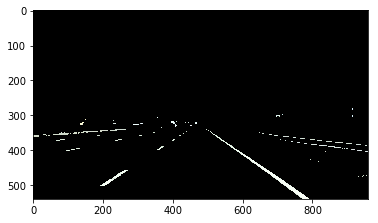

In [14]:
color_select_2 = np.copy(image)

#update the threshold
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Identify pixels below the threshold
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select_2[thresholds] = [0,0,0]

# Display the image                 
plt.imshow(color_select_2)

#### 2 Region Masking
At this point, however, it would still be tricky to extract the exact lines automatically, because we still have some other objects detected around the periphery that aren't lane lines. In this case, I'll assume that the front facing camera that took the image is mounted in a fixed position on the car, such that the lane lines will always appear in the same general region of the image. Next, I'll take advantage of this by adding a criterion to only consider pixels for color selection in the region where we expect to find the lane lines.

In [51]:
region_select = np.copy(image)
# Define a triangle region of interest
# the origin (0,0) is in the upper left in image processing
left_bottom = [180, 500]
right_bottom = [800, 540]
apex = [480, 320]

In [52]:
# Linear fit (y = Ax + B) to identify the 3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((right_bottom[0], left_bottom[0]), (right_bottom[1], left_bottom[1]), 1)

In [53]:
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_threshold = (YY > (XX * fit_left[0] + fit_left[1])) & \
                   (YY > (XX * fit_right[0] + fit_right[1])) & \
                   (YY < (XX * fit_bottom[0] + fit_bottom[1]))
region_select[region_threshold] = [255, 0, 0]

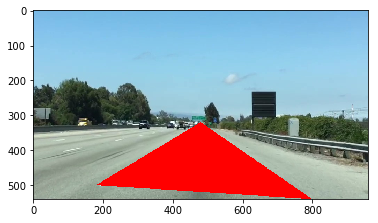

In [54]:
plt.imshow(region_select)

#### Finding Lines of Any Color
As it happens, lane lines are not always the same color, and even lines of the same color under different lighting conditions (day, night, etc) may fail to be detected by our simple color selection.
What we need is to take our algorithm to the next level to detect lines of any color using sophisticated computer vision methods.
So, what is computer vision?